In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/varunvinodh/Downloads/module_5_starter_code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/varunvinodh/Downloads/module_5_starter_code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharm_data_complete = pd.merge(mouse_metadata, study_results, how="left")

# Display the data table for preview
pharm_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice.
mice_count = len(pharm_data_complete["Mouse ID"].unique())
mice_count

249

In [44]:
duplicates = pharm_data_complete(["Mouse ID"]).value_counts
duplicates = duplicates[duplicates > 1].index
print(duplicates)

TypeError: 'DataFrame' object is not callable

In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pharm_data_complete.drop_duplicates(subset:=['Mouse ID','Timepoint'], keep=False, inplace = True)
pharm_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
mice_count = len(pharm_data_complete["Mouse ID"].unique())
mice_count

249

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_vol = pharm_data_complete.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_vol = pharm_data_complete.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var_vol = pharm_data_complete.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_vol = pharm_data_complete.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
ser_vol = pharm_data_complete.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


summary_summary = pd.DataFrame({"Mean Tumor Volume": mean_vol,
                                   "Median Tumor Volume": median_vol,
                                   "Tumor Volume Variance": var_vol,
                                   "Volume Std Dev": std_vol,
                                   "Volume Std Err":ser_vol})

summary_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Volume Std Dev,Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

result = pharm_data_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'var', lambda x: np.std(x) / np.sqrt(len(x))]})
result

Tumor Volume (mm3)                                           
                           mean     median       std        var <lambda_0>
Drug Regimen                                                              
Capomulin             40.675741  41.557809  4.994774  24.947764   0.328629
Ceftamin              52.591172  51.776157  6.268188  39.290177   0.468499
Infubinol             52.884795  51.820584  6.567243  43.128684   0.490851
Ketapril              55.235638  53.698743  8.279709  68.553577   0.602252
Naftisol              54.331565  52.509285  8.134708  66.173479   0.594860
Placebo               54.033581  52.288934  7.821003  61.168083   0.579722
Propriva              52.393463  50.909965  6.568014  43.138803   0.524174
Ramicane              40.216745  40.673236  4.846308  23.486704   0.320250
Stelasyn              54.233149  52.431737  7.710419  59.450562   0.571526
Zoniferol             53.236507  51.818479  6.966589  48.533355   0.514977

<AxesSubplot:xlabel='Drug Regimen'>

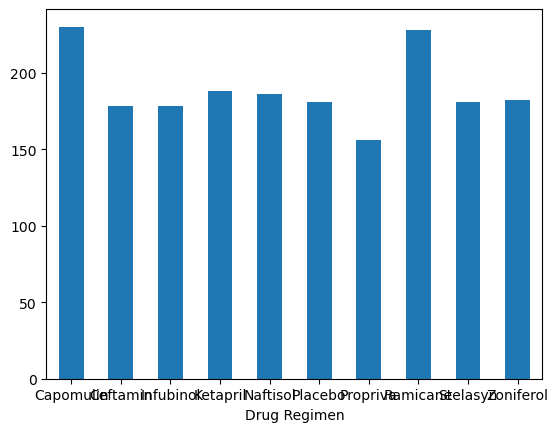

In [84]:
# group the data by 'Drug Regimen' and count the number of 'Timepoint' values
grouped_df1 =  pharm_data_complete.groupby(['Drug Regimen'])['Timepoint'].count()

# create the bar plot
grouped_df1.plot.bar(rot=0)


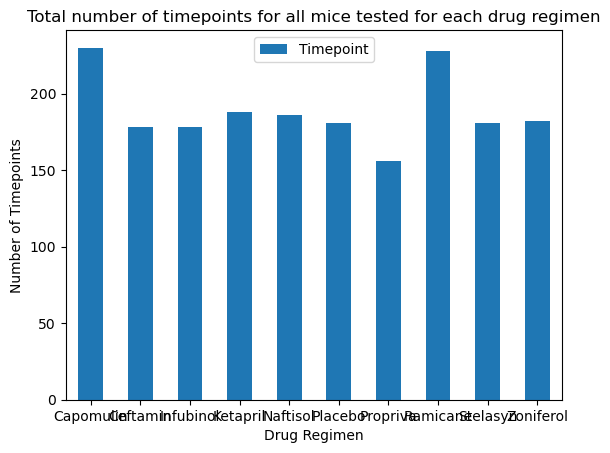

In [85]:
# group the data by 'Drug Regimen' and count the number of 'Timepoint' values
grouped_df4 = pharm_data_complete.groupby(['Drug Regimen'])['Timepoint'].count().reset_index()

# create the bar plot
grouped_df4.plot.bar(x='Drug Regimen', y='Timepoint', rot=0)

# add title and labels
plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# show the plot
plt.show()

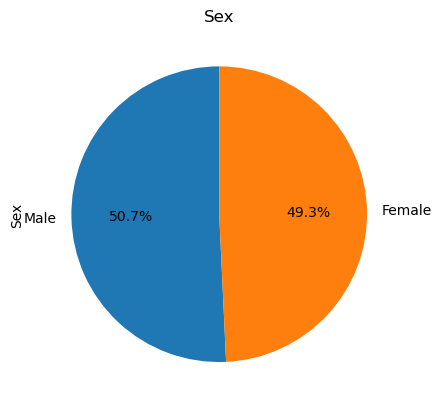

In [87]:
# Count the number of occurrences of each gender
gender_counts = pharm_data_complete['Sex'].value_counts()

# Plot the pie chart using the plot method
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90)

# Add title to the plot
title = "Sex"
_ = plt.title(title)

# Display the plot
_ = plt.show()

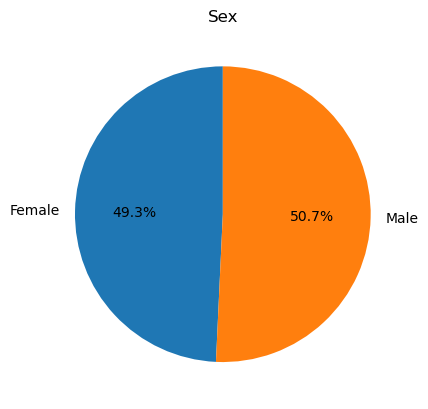

In [86]:
# Count the number of occurrences of each gender
female_mice = pharm_data_complete['Sex'].value_counts()['Female']
male_mice = pharm_data_complete['Sex'].value_counts()['Male']

# Pie chart
labels = ['Female', 'Male']
sizes = [female_mice, male_mice]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add title and display the pie chart
ax.set_title("Sex")
plt.show()

In [3]:
last_timepoint = pd.DataFrame(pharm_data_complete["Timepoint"].groupby(pharm_data_complete["Mouse ID"]).last())
last_timepoint = last_timepoint.rename(columns={"Timepoint":"Last Timepoint"})
last_timepoint = last_timepoint.reset_index()
last_timepoint

,Mouse ID,Last Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [6]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_pd = pd.merge(pharm_data_complete, last_timepoint, on="Mouse ID", how="inner")
new_pd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [7]:
last_timepoint = new_pd.loc[(new_merge["Timepoint"] == new_pd["Last Timepoint"]), :]
last_timepoint = last_timepoint.reset_index()
last_timepoint

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,9,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,19,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,29,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,39,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...,...
244,1859,z314,Stelasyn,Female,21,28,5,45.934712,0,5
245,1862,z435,Propriva,Female,12,26,10,48.710661,0,10
246,1872,z581,Infubinol,Female,24,25,45,62.754451,3,45
247,1882,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [8]:
selected_treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


In [9]:
tumor_volume = []
treatments = []

In [10]:
for treatment in selected_treatments:
    final_tumor_vol = last_timepoint.loc[last_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    tumor_outliers = final_tumor_vol[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    
    print(treatment, tumor_outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


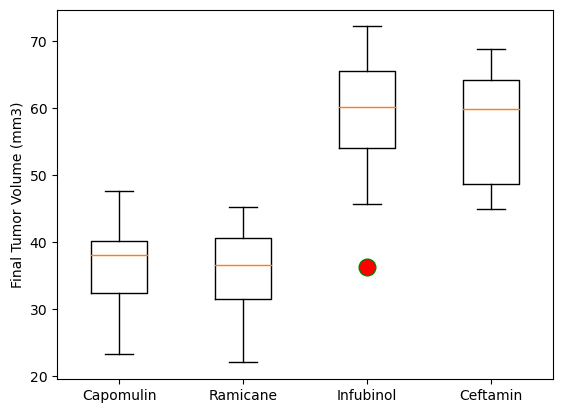

In [12]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(tumor_volume, labels=selected_treatments, flierprops=flierprops)
#plt.xticks(selected_treatments)
plt.ylabel ("Final Tumor Volume (mm3)")
plt.show()

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_l509 = pharm_data_complete.loc[(pharm_data_complete["Mouse ID"] == "l509"), :]
cap_l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0, 0.5, 'Tumor Volume (mm3)')

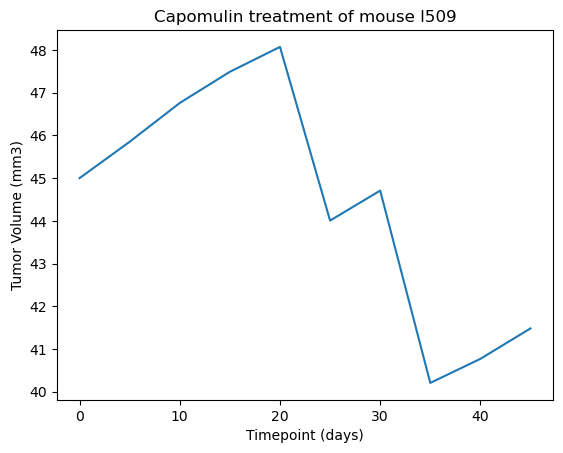

In [17]:
x_axis = cap_l509["Timepoint"]
y_axis = cap_l509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title ("Capomulin treatment of mouse l509")
plt.xlabel ("Timepoint (days)")
plt.ylabel ("Tumor Volume (mm3)")

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = pharm_data_complete.loc[(pharm_data_complete["Drug Regimen"] == "Capomulin"), :]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [19]:
mice_volumes = capomulin.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
mice_volumes

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [20]:
mice_weights = capomulin.groupby("Mouse ID").mean()["Weight (g)"]
mice_weights

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

Text(0, 0.5, 'Average Tumor Volume (mm3)')

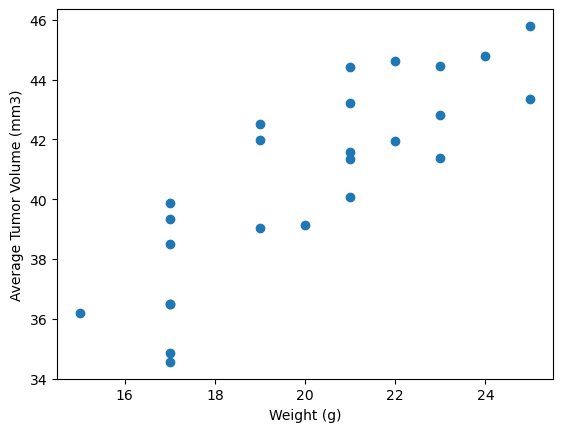

In [21]:
plt.scatter(mice_weights, mice_volumes)

plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")

In [24]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between weight and the avg tumor volume is {round(st.pearsonr(mice_weights,mice_volumes)[0],2)}")

The correlation between weight and the avg tumor volume is 0.84


The r-squared is: 0.7088568047708723


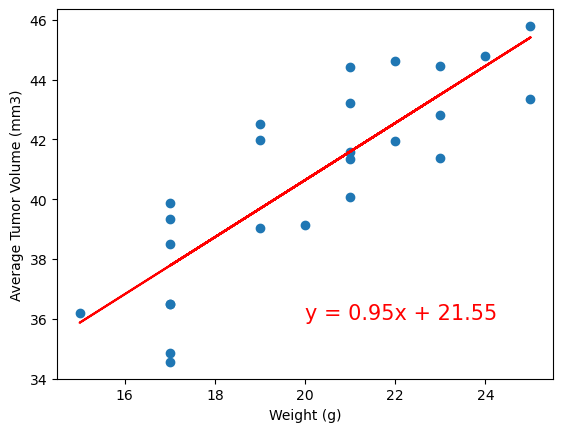

In [25]:
x_values = mice_weights
y_values = mice_volumes
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()